In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
from shapely.geometry import *
import pandas as pd
import numpy as np

Canada demand as a function of NAICS

In [2]:
canada_demand = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\GeoToolAll_Methods\Water Source Data\Industrial\canada_demand_naics.csv')
state_demand = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\GeoToolAll_Methods\Water Source Data\Industrial\water_demand_by_state.csv')
county_demand = pd.read_csv(r'C:\Users\mhardika\Documents\AMO\GeoToolAll_Methods\Water Source Data\Industrial\USGS_industrial_metric.csv')

USA : water demand as a function of NAICS

In [3]:
# Canada data is in million cubic meter
canada_total = canada_demand['annual_demand'].sum()
usa_total = state_demand['IN-WFrTo'].sum()
# print(usa_total/1e6)
# print(canada_total)

naics_fraction = canada_demand['fraction']
state_list = state_demand['state']
county_list = county_demand['COUNTY']
naics_list = canada_demand['naics']

usa_naics_fraction_df = pd.DataFrame(columns = ['naics','fraction','water_demand (m3/yr)'])
usa_naics_fraction = naics_fraction*usa_total
usa_naics_fraction_df['naics'] = naics_list
usa_naics_fraction_df['fraction'] = naics_fraction
usa_naics_fraction_df['water_demand (m3/yr)'] = usa_naics_fraction
usa_naics_fraction_df

,naics,fraction,water_demand (m3/yr)
0,311,0.080358,1.553221e+09
1,312,0.011683,2.258179e+08
2,313,0.000290,5.605341e+06
3,314,0.000053,1.024424e+06
4,321,0.005987,1.157213e+08
5,322,0.362783,7.012146e+09
6,324,0.054249,1.048566e+09
7,325,0.140197,2.709834e+09
8,326,0.002479,4.791600e+07
9,327,0.016140,3.119662e+08


Creating table for demand data based on Canada data

In [4]:
columns = ['state','county','naics', 'state_demand (m3/yr)', 'county_demand (m3/yr)','naics_fraction','naics_demand (m3/yr)']
demand_table = pd.DataFrame(columns = columns)
for state in ['CO']:
    county_list = county_demand[county_demand['STATE']==state]['COUNTY']
    for county in county_list:
        for naics in naics_list:
            temp = {
                'state':state,
                'county':county,
                'naics':naics,
                'state_demand (m3/yr)': state_demand[state_demand['state']==state]['IN-WFrTo'].values[0],
                'county_demand (m3/yr)': county_demand[(county_demand['STATE']==state) & (county_demand['COUNTY']==county)]['IN-WFrTo'].values[0],
                'naics_fraction': canada_demand[canada_demand['naics']==naics]['fraction'].values[0],
                'naics_demand (m3/yr)': 0,
            }

            temp = pd.DataFrame([temp])
            demand_table= pd.concat([demand_table,temp])
            demand_table.reset_index()
# temp
demand_table


,state,county,naics,state_demand (m3/yr),county_demand (m3/yr),naics_fraction,naics_demand (m3/yr)
0,CO,Adams County,311,116171282.3,359235.6495,0.080358,0
0,CO,Adams County,312,116171282.3,359235.6495,0.011683,0
0,CO,Adams County,313,116171282.3,359235.6495,0.000290,0
0,CO,Adams County,314,116171282.3,359235.6495,0.000053,0
0,CO,Adams County,321,116171282.3,359235.6495,0.005987,0
...,...,...,...,...,...,...,...
0,CO,Yuma County,333,116171282.3,0.0000,0.000448,0
0,CO,Yuma County,334,116171282.3,0.0000,0.000475,0
0,CO,Yuma County,335,116171282.3,0.0000,0.000422,0
0,CO,Yuma County,336,116171282.3,0.0000,0.006646,0


Creating table format for final place and demand data

In [5]:
columns = ['state','county','location','naics','employee count','capacity_fraction','water demand (m3/yr)']
industry_demand = pd.DataFrame(columns=columns)

Reading industry location file

In [6]:
df = gp.read_file('/Users/mhardika/Documents/AMO/GeoToolAll_Methods/Water Source Data/Industrial/General_Manufacturing_Facilities/General_Manufacturing_Facilities.shp')
# df = df.to_crs("EPSG:4326")
# # fig, ax = plt.subplots()
# # df.plot(ax=ax,figsize=(50, 50))

In [7]:
# Drop rows with none in the index
df = df.dropna()
df_state = df.set_index('STATE')
df_state.index.unique()

Index(['GU', 'MP', 'AK', 'ME', 'AS', 'HI', 'CO', 'ID', 'MN', 'OR', 'UT', 'WA',
       'WY', 'CA', 'NV', 'AZ', 'MT', 'ND', 'SD', 'WI', 'NM', 'TX', 'NE', 'KS',
       'OK', 'IA', 'MO', 'AR', 'LA', 'FL', 'PR', 'VI', 'DE', 'IL', 'MD', 'NC',
       'NJ', 'VA', 'MS', 'TN', 'AL', 'GA', 'SC', 'KY', 'IN', 'MI', 'OH', 'WV',
       'PA', 'DC', 'NY', 'MA', 'NH', 'VT', 'CT', 'RI'],
      dtype='object', name='STATE')

In [8]:
# Drop non-contiguous states
contiguous_usa = ('AL','AZ','AR','CA','CO','CT','DE','FL','GA','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE',
                  'NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY','DC')

for state in df_state.index.unique():
    if state in contiguous_usa:
        pass
    else:
        df_state.drop(index=state,inplace=True) 
df_state = df_state.reset_index()

In [26]:
df_state['geometry'].crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World - 85°S to 85°N
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
industry_demand['state'] = df_state['STATE']
industry_demand['county'] = [county.capitalize() + ' County' for county in df_state['COUNTY']]
industry_demand['location'] = df_state['geometry']
industry_demand['naics'] = df_state['NAICS'].astype(str).str[:3]
industry_demand['employee count']=df_state['EMP']
industry_demand['capacity_fraction']=0
industry_demand[industry_demand['state']=='AZ'].head()

,state,county,location,naics,employee count,capacity_fraction,water demand (m3/yr)
8795,AZ,Mohave County,POINT (-12685854.857 4199263.869),332,180.0,0,NaN
8796,AZ,Coconino County,POINT (-12431626.821 4189405.898),333,80.0,0,NaN
8797,AZ,Mohave County,POINT (-12576235.448 4433495.015),325,15.0,0,NaN
8798,AZ,Mohave County,POINT (-12707621.669 4214702.079),331,50.0,0,NaN
8799,AZ,Coconino County,POINT (-12431550.412 4189185.936),N/A,100.0,0,NaN


In [10]:
# Drop rows where naics is outside the values below
naics_list = (311,312,313,314,321,322,324,325,326,327,331,332,333,334,335,336,339)
industry_demand_naics = industry_demand.set_index('naics')
for code in industry_demand_naics.index.unique():
    if code == 'N/A':
        industry_demand_naics.drop(index=code,inplace=True)
    elif int(code) in naics_list:
        pass
    else:
        industry_demand_naics.drop(index=code,inplace=True) 
industry_demand_naics = industry_demand_naics.reset_index()
industry_demand_naics


,naics,state,county,location,employee count,capacity_fraction,water demand (m3/yr)
0,325,ME,Aroostook County,POINT (-7570865.263 5893433.624),25.0,0,NaN
1,321,ME,Penobscot County,POINT (-7628724.860 5683559.528),35.0,0,NaN
2,321,ME,Aroostook County,POINT (-7574356.309 5893796.189),250.0,0,NaN
3,321,ME,Aroostook County,POINT (-7565637.822 5967926.491),35.0,0,NaN
4,333,ME,Aroostook County,POINT (-7574537.582 5892961.303),30.0,0,NaN
...,...,...,...,...,...,...,...
118438,332,ME,Lincoln County,POINT (-7733764.963 5455888.645),127.0,0,NaN
118439,321,ME,Androscoggin County,POINT (-7824689.421 5474625.336),25.0,0,NaN
118440,312,ME,Androscoggin County,POINT (-7831556.609 5469360.187),400.0,0,NaN
118441,332,ME,Cumberland County,POINT (-7851057.423 5453533.112),25.0,0,NaN


In [124]:
industry_demand_naics[industry_demand_naics['county']=='Apache County']

,naics,state,county,location,employee count,capacity_fraction,water demand (m3/yr)
20364,321,AZ,Apache County,POINT (-12157097.261 4022561.168),30.0,0.000057,6652.586453
20413,321,AZ,Apache County,POINT (-12171117.728 4043373.390),43.0,0.000082,9535.373916
20486,321,AZ,Apache County,POINT (-12170981.317 4043403.250),15.0,0.000029,3326.293226


Calculating water demand using capacity fraction and water demand across USA for a specific NAICS

In [11]:
for code in industry_demand_naics['naics'].unique():
    industry_demand_naics.loc[industry_demand_naics.naics == code, 'capacity_fraction'] = industry_demand_naics[industry_demand_naics['naics']==code]['employee count']/sum(industry_demand_naics[industry_demand_naics['naics']==code]['employee count'])
    industry_demand_naics.loc[industry_demand_naics.naics == code, 'water demand (m3/yr)'] =  industry_demand_naics[industry_demand_naics['naics']==code]['capacity_fraction']*usa_naics_fraction_df[usa_naics_fraction_df['naics']==int(code)]['water_demand (m3/yr)'].values[0]

industry_demand_naics

,naics,state,county,location,employee count,capacity_fraction,water demand (m3/yr)
0,325,ME,Aroostook County,POINT (-7570865.263 5893433.624),25.0,0.000029,78312.395969
1,321,ME,Penobscot County,POINT (-7628724.860 5683559.528),35.0,0.000067,7761.350862
2,321,ME,Aroostook County,POINT (-7574356.309 5893796.189),250.0,0.000479,55438.220441
3,321,ME,Aroostook County,POINT (-7565637.822 5967926.491),35.0,0.000067,7761.350862
4,333,ME,Aroostook County,POINT (-7574537.582 5892961.303),30.0,0.000024,206.875524
...,...,...,...,...,...,...,...
118438,332,ME,Lincoln County,POINT (-7733764.963 5455888.645),127.0,0.000086,8390.011805
118439,321,ME,Androscoggin County,POINT (-7824689.421 5474625.336),25.0,0.000048,5543.822044
118440,312,ME,Androscoggin County,POINT (-7831556.609 5469360.187),400.0,0.003589,810414.419624
118441,332,ME,Cumberland County,POINT (-7851057.423 5453533.112),25.0,0.000017,1651.577127


Comparison of calculated county level water demand vs USGS

In [136]:
county_demand_calc = sum

county_demand_calc = pd.DataFrame(columns = ['county','demand'])
county_list = county_demand[county_demand['STATE']=='CO']['COUNTY']

for county in county_list:
    temp = {'county': county,
            'demand':industry_demand_naics[industry_demand_naics['county']==county]['water demand (m3/yr)'].sum()}

    temp = pd.DataFrame([temp])
    county_demand_calc= pd.concat([county_demand_calc,temp])

county_demand_calc.reset_index()
county_demand_calc= county_demand_calc.sort_values(by=['county'])

In [137]:
county_demand_calc

,county,demand
0,Adams County,2.753452e+06
0,Alamosa County,8.271577e+03
0,Arapahoe County,3.610905e+05
0,Archuleta County,0.000000e+00
0,Baca County,0.000000e+00
...,...,...
0,Summit County,4.347709e+06
0,Teller County,6.931504e+02
0,Washington County,9.690377e+06
0,Weld County,5.731067e+05


In [140]:
demand_table_sample = demand_table[demand_table['state']=='CO'].groupby('county').first()
demand_table_sample

,state,naics,state_demand (m3/yr),county_demand (m3/yr),naics_fraction,naics_demand (m3/yr)
county,,,,,,
Adams County,CO,311,116171282.3,359235.6495,0.080358,0
Alamosa County,CO,311,116171282.3,0.0000,0.080358,0
Arapahoe County,CO,311,116171282.3,0.0000,0.080358,0
Archuleta County,CO,311,116171282.3,0.0000,0.080358,0
Baca County,CO,311,116171282.3,0.0000,0.080358,0
...,...,...,...,...,...,...
Summit County,CO,311,116171282.3,0.0000,0.080358,0
Teller County,CO,311,116171282.3,0.0000,0.080358,0
Washington County,CO,311,116171282.3,0.0000,0.080358,0


61.88829159925675


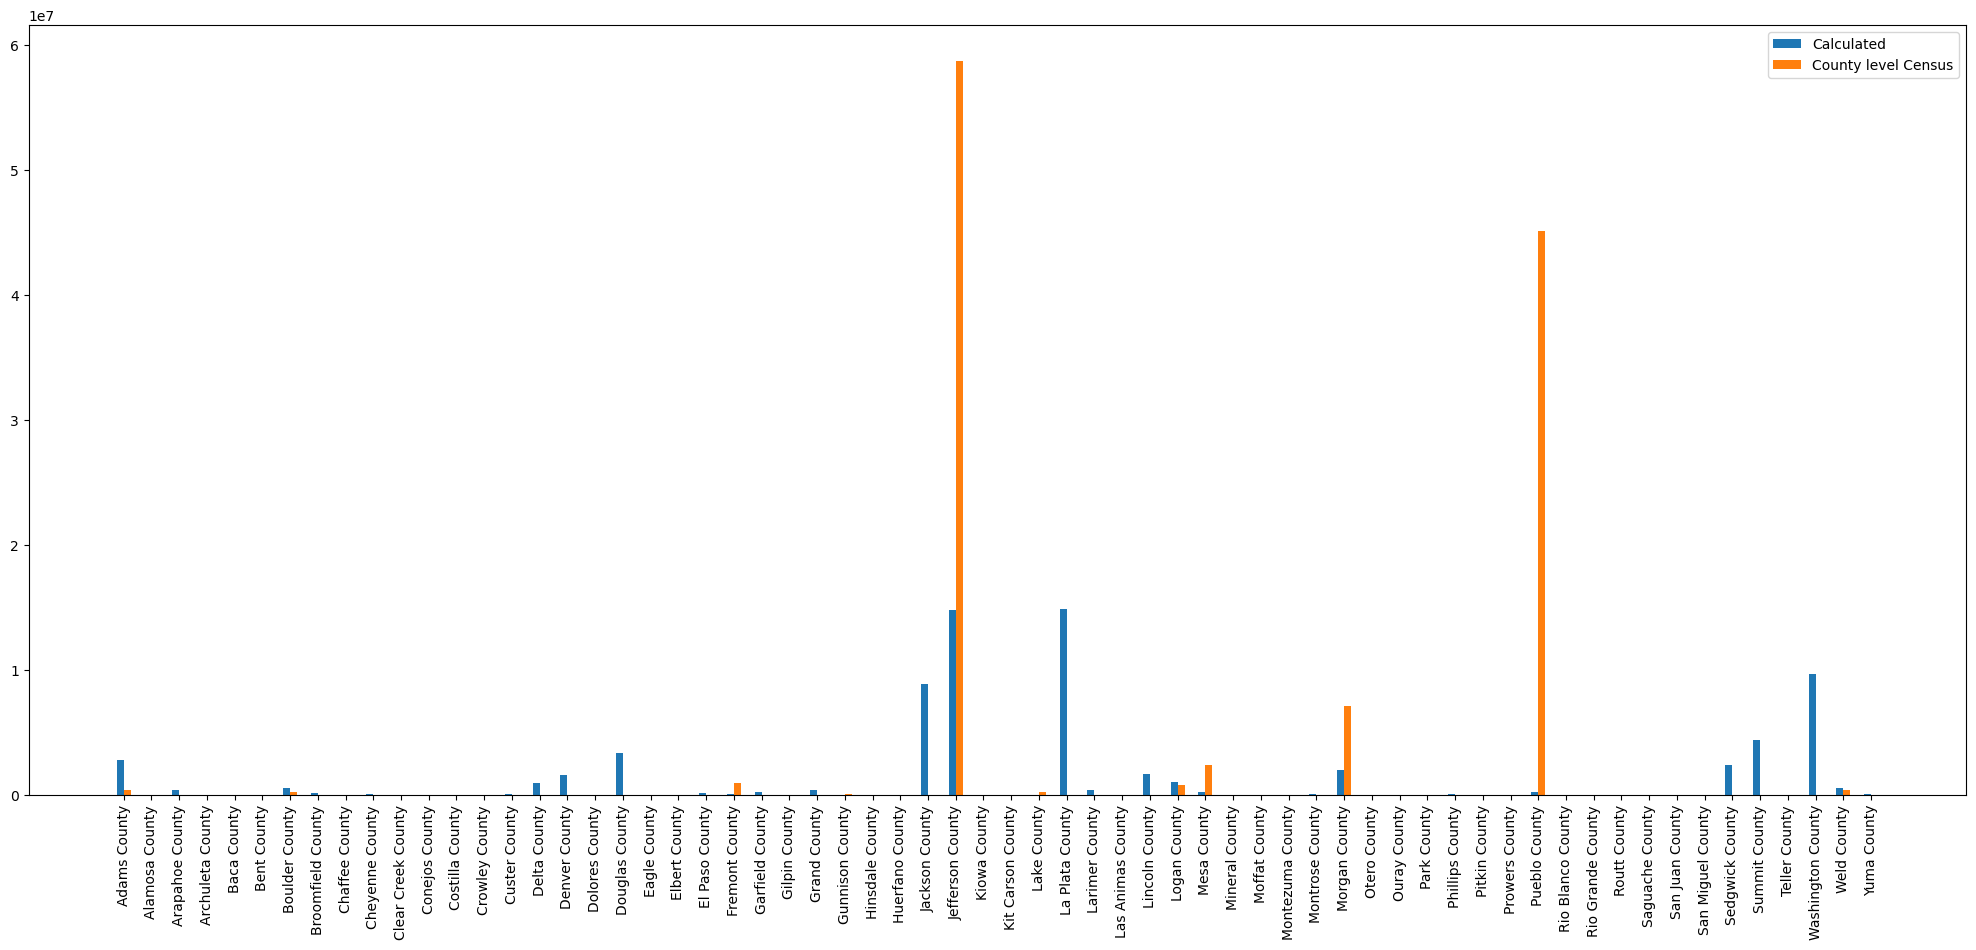

In [150]:
fig,ax = plt.subplots(figsize=(25,10))
x = np.array(range(0,len(county_list)))

ax.bar(x-0.125, county_demand_calc['demand'], width = 0.25,label='Calculated')
ax.bar(x+0.125, demand_table_sample.sort_values(by=['county'])['county_demand (m3/yr)'], width = 0.25, label = 'County level Census')
ax.legend()

ax.set_xticks(range(0,len(county_list)),county_list,rotation = 90)

frac = sum( county_demand_calc['demand'])/sum(demand_table_sample['county_demand (m3/yr)'])
print(frac*100)

In [89]:
# Add county wise and NAICS wise capacity fraction

for state in ['AZ']:#state_list:
    county_list = county_demand[county_demand['STATE']==state]['COUNTY']
    industry_demand.loc[industry_demand.state == state,'state demand (m3/yr)'] = demand_table[(demand_table['state']==state)]['state_demand (m3/yr)'].unique()[0]
    for county in county_list:
        frac = industry_demand[(industry_demand['state']==state) & (industry_demand['county']==county)]['employee count']/sum(industry_demand[(industry_demand['state']==state) & (industry_demand['county']==county)]['employee count'])
        industry_demand.loc[(industry_demand.state == state) & (industry_demand.county == county) ,'capacity_fraction'] = frac      
        industry_demand.loc[(industry_demand.state == state) & (industry_demand.county == county) ,'county demand (m3/yr)'] = demand_table[(demand_table['state']==state) & (demand_table['county']==county)]['county_demand (m3/yr)'].unique()[0]


industry_demand['water demand (m3/yr)'] = industry_demand['capacity_fraction']*industry_demand['county demand (m3/yr)']
industry_demand[industry_demand.state == 'AZ'].head()

,state,county,location,naics,state demand (m3/yr),county demand (m3/yr),employee count,capacity_fraction,water demand (m3/yr)
8795,AZ,Mohave County,POINT (-12685854.857 4199263.869),332,8455854.519,124350.8017,180.0,0.058978,7333.926706
8796,AZ,Coconino County,POINT (-12431626.821 4189405.898),333,8455854.519,13816.75575,80.0,0.021097,291.492737
8797,AZ,Mohave County,POINT (-12576235.448 4433495.015),325,8455854.519,124350.8017,15.0,0.004915,611.160559
8798,AZ,Mohave County,POINT (-12707621.669 4214702.079),331,8455854.519,124350.8017,50.0,0.016383,2037.201863
8799,AZ,Coconino County,POINT (-12431550.412 4189185.936),N/A,8455854.519,13816.75575,100.0,0.026371,364.365922


In [122]:
industry_demand.capacity_fraction.max

<bound method NDFrame._add_numeric_operations.<locals>.max of 0         0
1         0
2         0
3         0
4         0
         ..
159578    0
159579    0
159580    0
159581    0
159582    0
Name: capacity_fraction, Length: 159583, dtype: int64>

In [14]:
us_counties = gp.read_file(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\GeoData\US_County_Boundaries\US_CountyBndrys.shp')
us_counties = us_counties.to_crs("EPSG:4326")

In [28]:
centroids_all = gp.GeoDataFrame(geometry=industry_demand_naics[industry_demand_naics['state']=='CO'].location)
point = centroids_all.dissolve().centroid
point = point.to_crs("EPSG:4326")

In [29]:
point

0    POINT (-105.20693 39.62843)
dtype: geometry

NameError: name 'point' is not defined

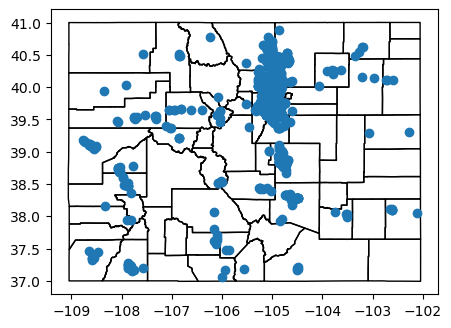

In [15]:
state_code = '08'
state = us_counties.loc[us_counties['STATEFP']==state_code]

fig, (ax) = plt.subplots(figsize=(5,5))

# All places
state.plot(ax=ax,figsize=(50, 50),facecolor ='none',edgecolor ='black')
centroids = gp.GeoSeries(industry_demand_naics[industry_demand_naics['state']=='CO'].location)
centroids = centroids.to_crs("EPSG:4326")
centroids.plot(ax=ax)
point.plot(ax=ax)

Attempting clustering of industries for Colorado->Writing to file Colorado data

In [13]:
industry_demand_naics[industry_demand_naics['state']=='CO'].to_csv(r'\Users\mhardika\Documents\AMO\GeoToolAll_Methods\Water Source Data\Industrial\co_location_data.csv')

In [23]:
industry_demand_naics[industry_demand_naics['state']=='CO'].location.values[0].crs()

AttributeError: 'Point' object has no attribute 'crs'